# MDL score vs. its estimate

## Visualization of comparison during search

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv("estimateVsScore.csv")
data.head()

Estimated bits saved  Actual bits saved Update rule type
0               17228.2           -56.1718     10FactorRule
1               17131.6          -110.9120     10FactorRule
2               17131.3          -111.2290     10FactorRule
3               17133.9          -108.9030     10FactorRule
4               17131.7          -111.0840     10FactorRule

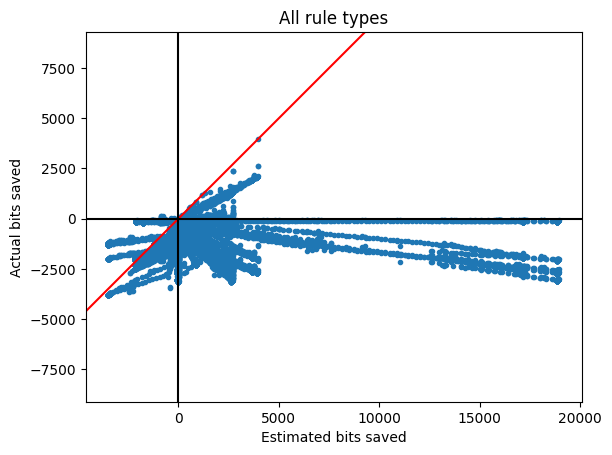

In [3]:
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=data["Estimated bits saved"], y=data["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("All rule types")
plt.axis("equal")
plt.show()

In [4]:
data["Update rule type"].unique()

array(['10FactorRule', '9ValueRule', '14DifferenceRule',
       '15ChangeRangeRule', '14ValueRangeRule', '12ValueSetRule'],
      dtype=object)

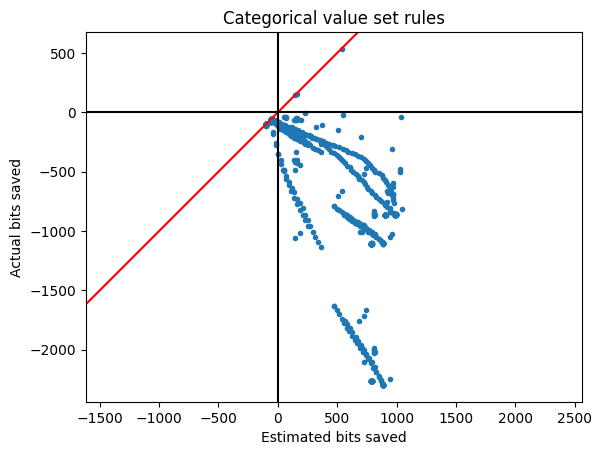

In [5]:
filteredData = data[data["Update rule type"] == "12ValueSetRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Categorical value set rules")
plt.axis("equal")
plt.show()

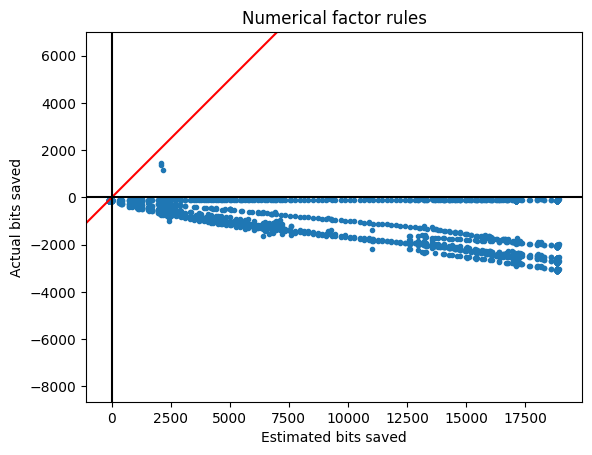

In [6]:
filteredData = data[data["Update rule type"] == "10FactorRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Numerical factor rules")
plt.axis("equal")
plt.show()

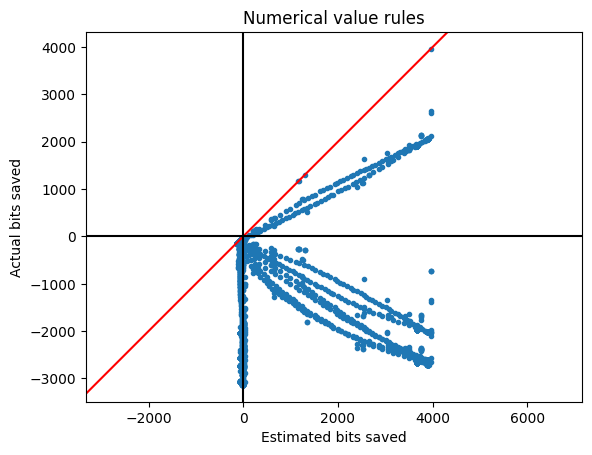

In [7]:
filteredData = data[data["Update rule type"] == "9ValueRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Numerical value rules")
plt.axis("equal")
plt.show()

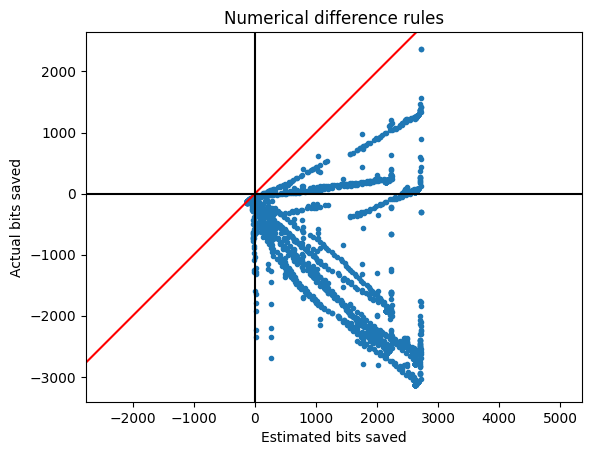

In [8]:
filteredData = data[data["Update rule type"] == "14DifferenceRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Numerical difference rules")
plt.axis("equal")
plt.show()

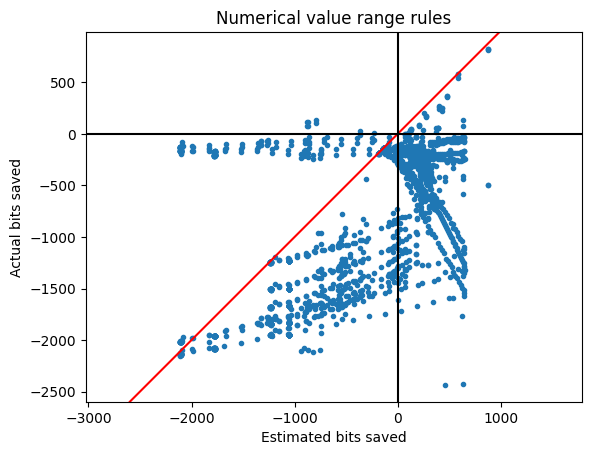

In [9]:
filteredData = data[data["Update rule type"] == "14ValueRangeRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Numerical value range rules")
plt.axis("equal")
plt.show()

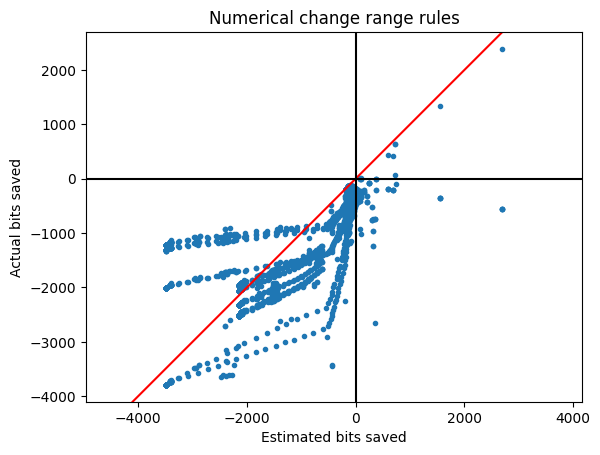

In [10]:
filteredData = data[data["Update rule type"] == "15ChangeRangeRule"]
plt.axline((0.0, 0.0), (1.0, 1.0), color="red")
plt.axline((0.0, 0.0), (0.0, 1.0), color="black")
plt.axline((0.0, 0.0), (1.0, 0.0), color="black")
plt.scatter(x=filteredData["Estimated bits saved"], y=filteredData["Actual bits saved"], marker=".")
plt.xlabel("Estimated bits saved")
plt.ylabel("Actual bits saved")
plt.title("Numerical change range rules")
plt.axis("equal")
plt.show()

## Toy example for non-optimism

In [1]:
import capnp
import matplotlib.pyplot as plt
import numpy as np

capnp.remove_import_hook()
interface_capnp = capnp.load("../../../cpp-tool/capnproto/interface.capnp", imports=["/usr/local/include"])

kj/filesystem-disk-unix.c++:1703: warning: PWD environment variable doesn't match current directory; pwd = /root/.vscode-server/bin/704ed70d4fd1c6bd6342c436f1ede30d1cff4710


In [2]:
!capnp convert json:binary ../../../cpp-tool/capnproto/interface.capnp EventLog < toyEventLog.json > /tmp/toyEventLog.bin
with open("/tmp/toyEventLog.bin", "rb") as file:
    log = interface_capnp.EventLog.read(file)

In [3]:
!capnp convert json:binary ../../../cpp-tool/capnproto/interface.capnp RuleModel < toyModel.json > /tmp/toyModel.bin
with open("/tmp/toyModel.bin", "rb") as file:
    model = interface_capnp.RuleModel.read(file)
nullModel = interface_capnp.RuleModel.new_message(rules=[])

In [4]:
!capnp convert json:binary ../../../cpp-tool/capnproto/interface.capnp RuleModel < extendedModel.json > /tmp/extendedModel.bin
with open("/tmp/extendedModel.bin", "rb") as file:
    extendedModel = interface_capnp.RuleModel.read(file)

In [5]:
!capnp convert json:binary ../../../cpp-tool/capnproto/interface.capnp ModificationRule < toyRule.json > /tmp/toyRule.bin
with open("/tmp/toyRule.bin", "rb") as file:
    rule = interface_capnp.ModificationRule.read(file)

In [6]:
client = capnp.TwoPartyClient("cpp-tool:21654")
processDataUpdates = client.bootstrap().cast_as(interface_capnp.ProcessDataUpdates)

In [7]:
processDataUpdates.calculateMdlScore(log=log, model=nullModel).wait().result

451.1275252266988

In [8]:
processDataUpdates.calculateMdlScore(log=log, model=model).wait().result

490.40006315809904

In [9]:
processDataUpdates.estimateBitsSaved(log=log, model=model, newRule=rule).wait().result

53.9293470348599

In [10]:
bitsBefore = processDataUpdates.calculateMdlScore(log=log, model=model).wait().result
bitsAfter = processDataUpdates.calculateMdlScore(log=log, model=extendedModel).wait().result
bitsBefore - bitsAfter

102.04254255404379